In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.concat([pd.read_csv('./data/train.csv'), pd.read_csv('./data/test.csv')])

In [34]:
df.isna().sum()

id                  0
region              0
year                0
manufacturer        0
condition           0
cylinders           0
fuel             2734
odometer            0
title_status      685
transmission        0
drive               0
size                0
type              685
paint_color         0
state            6333
price           27537
dtype: int64

In [6]:
#「/」は何？
df.region.unique()

array(['nashville', 'state college', 'wichita', 'albany', 'redding',
       'florence / muscle shoals', 'oregon coast', 'medford-ashland',
       'richmond', 'buffalo', 'billings', 'bakersfield', 'central NJ',
       'worcester / central MA', 'eau claire', 'greenville / upstate',
       'yakima', 'washington, DC', 'palm springs', 'cincinnati',
       'rockford', 'rochester', 'lancaster', 'fort wayne', 'toledo',
       'wilmington', 'huntsville / decatur', 'orlando',
       'sarasota-bradenton', 'las cruces', 'mohave county', 'tulsa',
       'indianapolis', 'fresno / madera', 'norfolk / hampton roads',
       'duluth / superior', 'san antonio', 'western massachusetts',
       'flagstaff / sedona', 'colorado springs', 'dayton / springfield',
       'delaware', 'las vegas', 'eastern panhandle', 'santa maria',
       'detroit metro', 'knoxville', 'rhode island', 'harrisonburg',
       'reading', 'northern michigan', 'bend', 'pueblo', 'houston',
       'killeen / temple / ft hood', 'stockto

In [33]:
# 3000代は異常値→2000代の打ち間違い？
len(df.year.unique()), df.year.unique()

(108,
 array([1949, 2013, 1998, 2014, 2005, 2006, 2012, 2011, 2010, 2018, 1999,
        1995, 1996, 2008, 2016, 2015, 2007, 2003, 2009, 1992, 1988, 2004,
        2001, 1971, 1994, 2002, 1989, 1997, 2019, 1990, 1983, 1982, 2017,
        1975, 1987, 1953, 1978, 1984, 1973, 1980, 1993, 1968, 2000, 2020,
        1967, 1976, 1974, 1985, 1986, 1960, 1991, 1936, 1957, 1962, 1964,
        1963, 1948, 1979, 2021, 1970, 1977, 1956, 1939, 1961, 1972, 1969,
        1931, 1981, 1966, 1942, 1940, 1965, 1955, 1959, 2022, 1952, 1950,
        1921, 1947, 1951, 1937, 1922, 1946, 2999, 1935, 1928, 1938, 1941,
        1943, 3008, 1954, 1932, 1958, 3017, 1929, 1934, 1925, 1944, 1945,
        1930, 3015, 1918, 1920, 1923, 3019, 3011, 1926, 1933]))

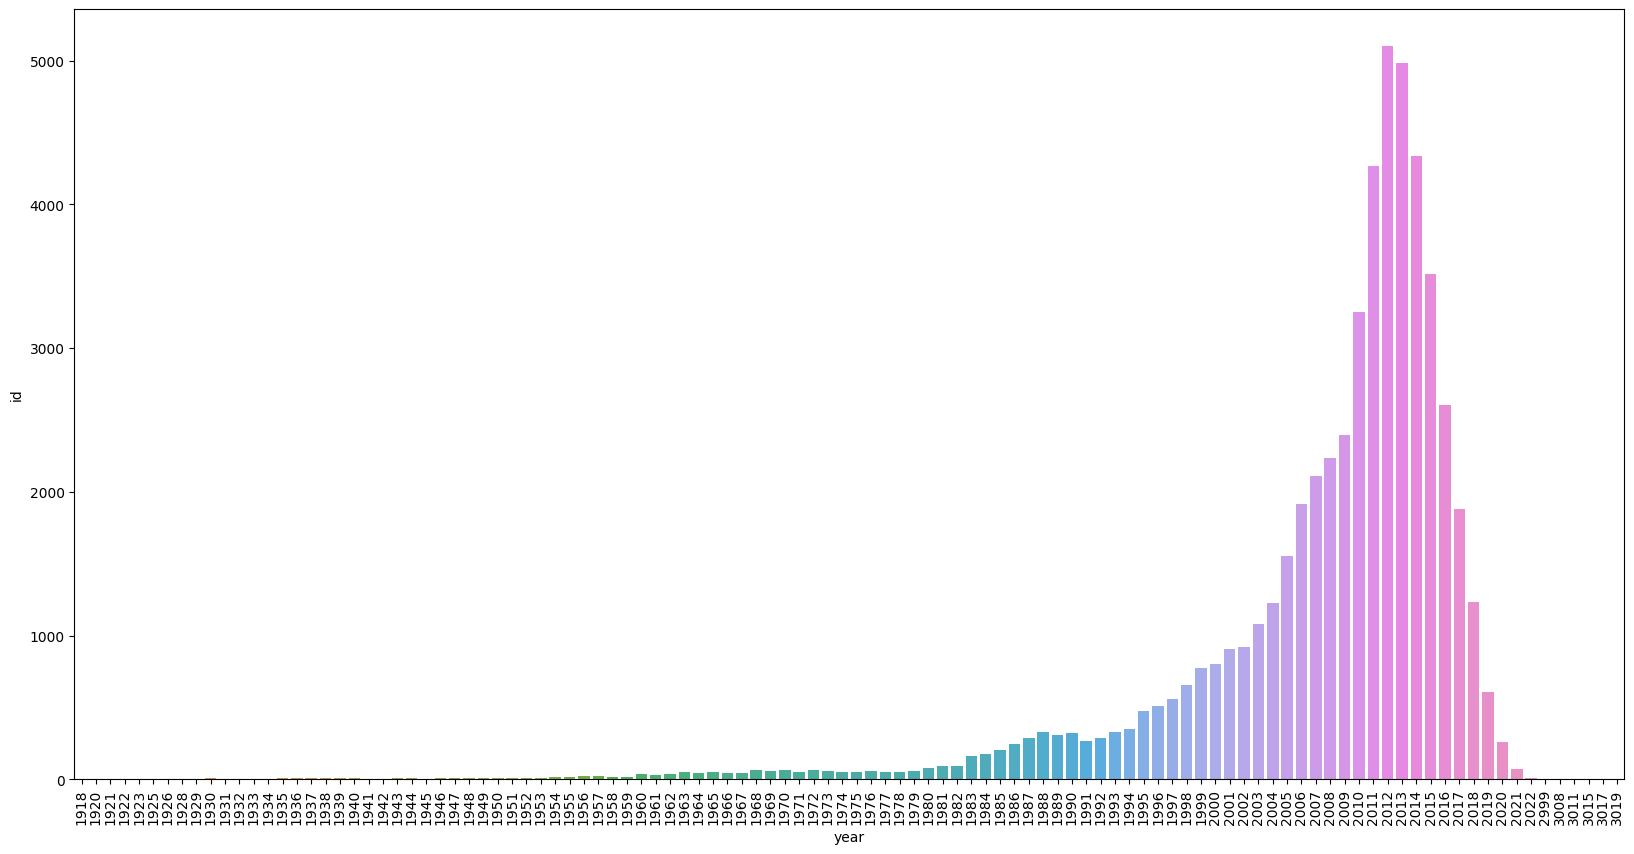

In [43]:
# データ処理
tmp_df = df[['id', 'year']].groupby('year').count()
tmp_df = tmp_df.reset_index()
tmp_df = tmp_df.sort_values('year')

# 可視化
plt.figure(figsize=(20, 10))
sns.barplot(y=tmp_df.id, x=tmp_df.year)
plt.xticks(rotation=90)
plt.show()

In [9]:
# 同じ会社名だがフォーマット違いが多種ある
df.manufacturer.unique()

array(['bmw', 'toyota', 'ford', 'nissan', 'volkswagen', 'FORD', 'lexus',
       'buick', 'subaru', 'ram', 'TOYOTA', 'dodge', 'ｂｍｗ', 'chevrolet',
       'RAM', 'BMW', 'jeep', 'ｃｈｅｖｒｏｌｅｔ', 'honda', 'NISSAN', 'hyundai',
       'chrysler', 'gmc', 'mazda', 'audi', 'lincoln', 'kia',
       'mercedes-benz', 'mitsubishi', 'CHEVROLET', 'GMC', 'ｆｏｒｄ', 'BUICK',
       'saturn', 'infiniti', 'MINI', 'mercury', 'cadillac',
       'MERCEDES-BENZ', 'pontiac', 'acura', 'HONDA', 'ACURA', 'KIA',
       'fiat', 'jaguar', 'ｒａｍ', 'mini', 'LEXUS', 'VOLKSWAGEN', 'ｋｉａ',
       'SUBARU', 'ｎｉｓｓａｎ', 'DODGE', 'volvo', 'HYUNDAI', 'MAZDA', 'ｈｏｎｄａ',
       'ｍａｚｄａ', 'INFINITI', 'CADILLAC', 'JEEP', 'LINCOLN', 'ｔｏｙｏｔａ',
       'niѕsan', 'AUDI', 'ＶＯＬＫＳＷＡＧＥＮ', 'ＣＨＥＶＲＯＬＥＴ', 'MERCURY', 'ｂｕｉｃｋ',
       'ROVER', 'ｄｏｄｇｅ', 'porsche', 'ｖｏｌｖｏ', 'ｖｏｌｋｓｗａｇｅｎ', 'JAGUAR',
       'SATURN', 'ｊｅｅｐ', 'rover', 'ｓｕｂａｒｕ', 'CHRYSLER', 'PONTIAC',
       'ｍｉｔｓｕｂｉｓｈｉ', 'ＴＯＹＯＴＡ', 'ＢＭＷ', 'ｃｈｒｙｓｌｅｒ', 'nisѕan', 'MITSUBISHI',
       'ｈｙｕｎｄａｉ', 'ｇｍｃ'

In [10]:
# 特になし
df.condition.unique()

array(['excellent', 'fair', 'good', 'like new', 'salvage', 'new'],
      dtype=object)

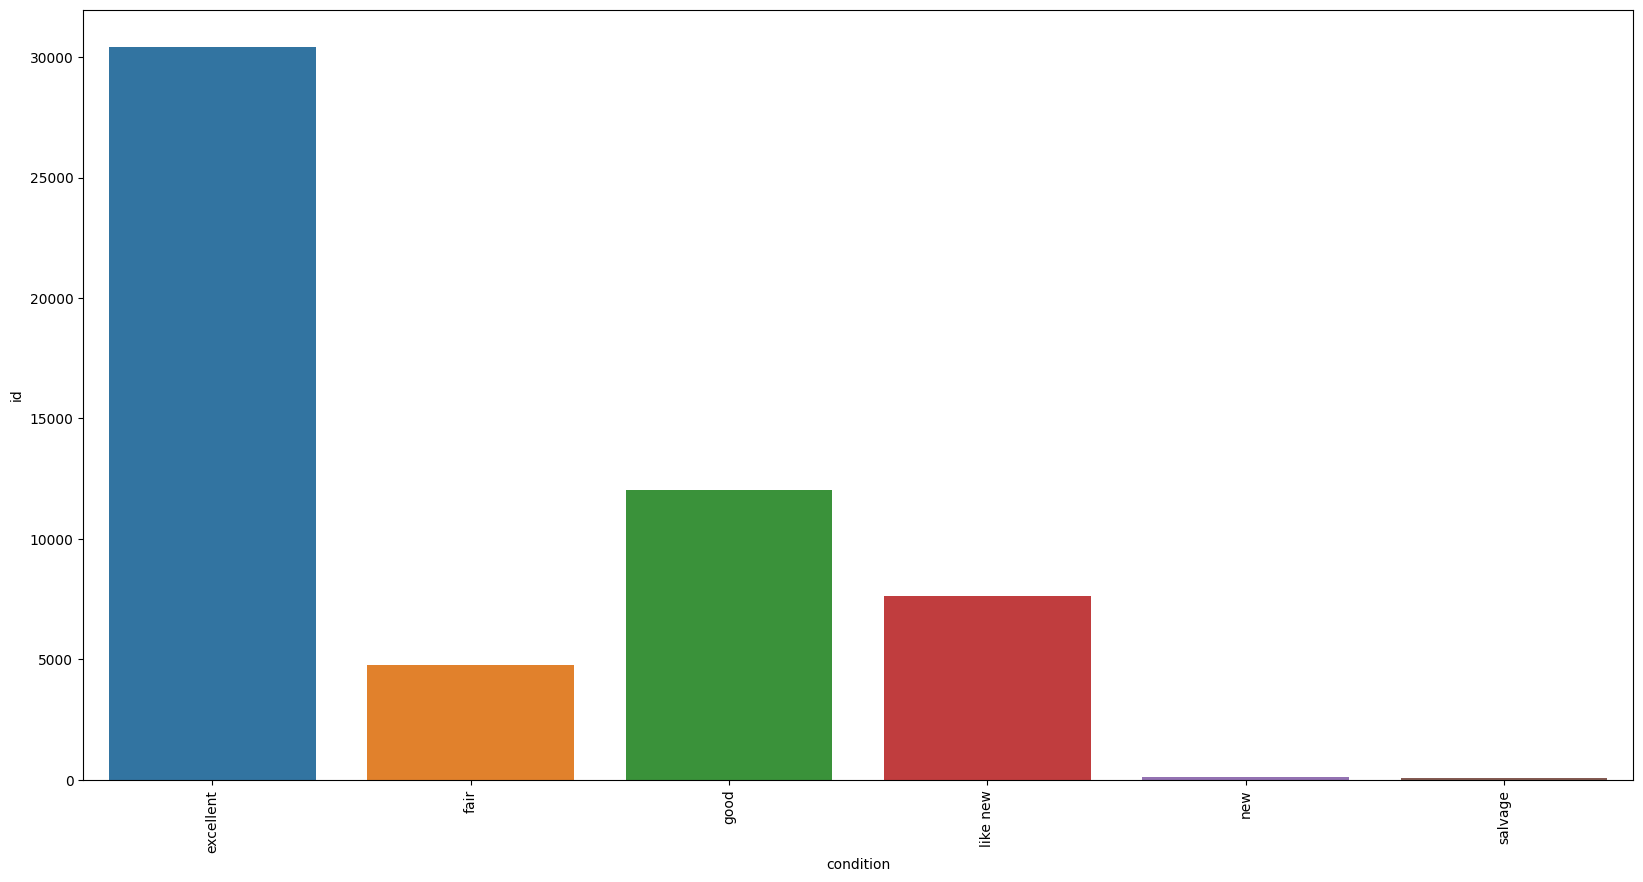

In [45]:
# データ処理
tmp_df = df[['id', 'condition']].groupby('condition').count()
tmp_df = tmp_df.reset_index()

# 可視化
plt.figure(figsize=(20, 10))
sns.barplot(y=tmp_df.id, x=tmp_df.condition)
plt.xticks(rotation=90)
plt.show()

In [11]:
#　気筒数がotherが意味するものは？ ex)ハイブリッドや電気自動車？
df.cylinders.unique()

array(['6 cylinders', '8 cylinders', '4 cylinders', 'other',
       '10 cylinders', '12 cylinders', '5 cylinders', '3 cylinders'],
      dtype=object)

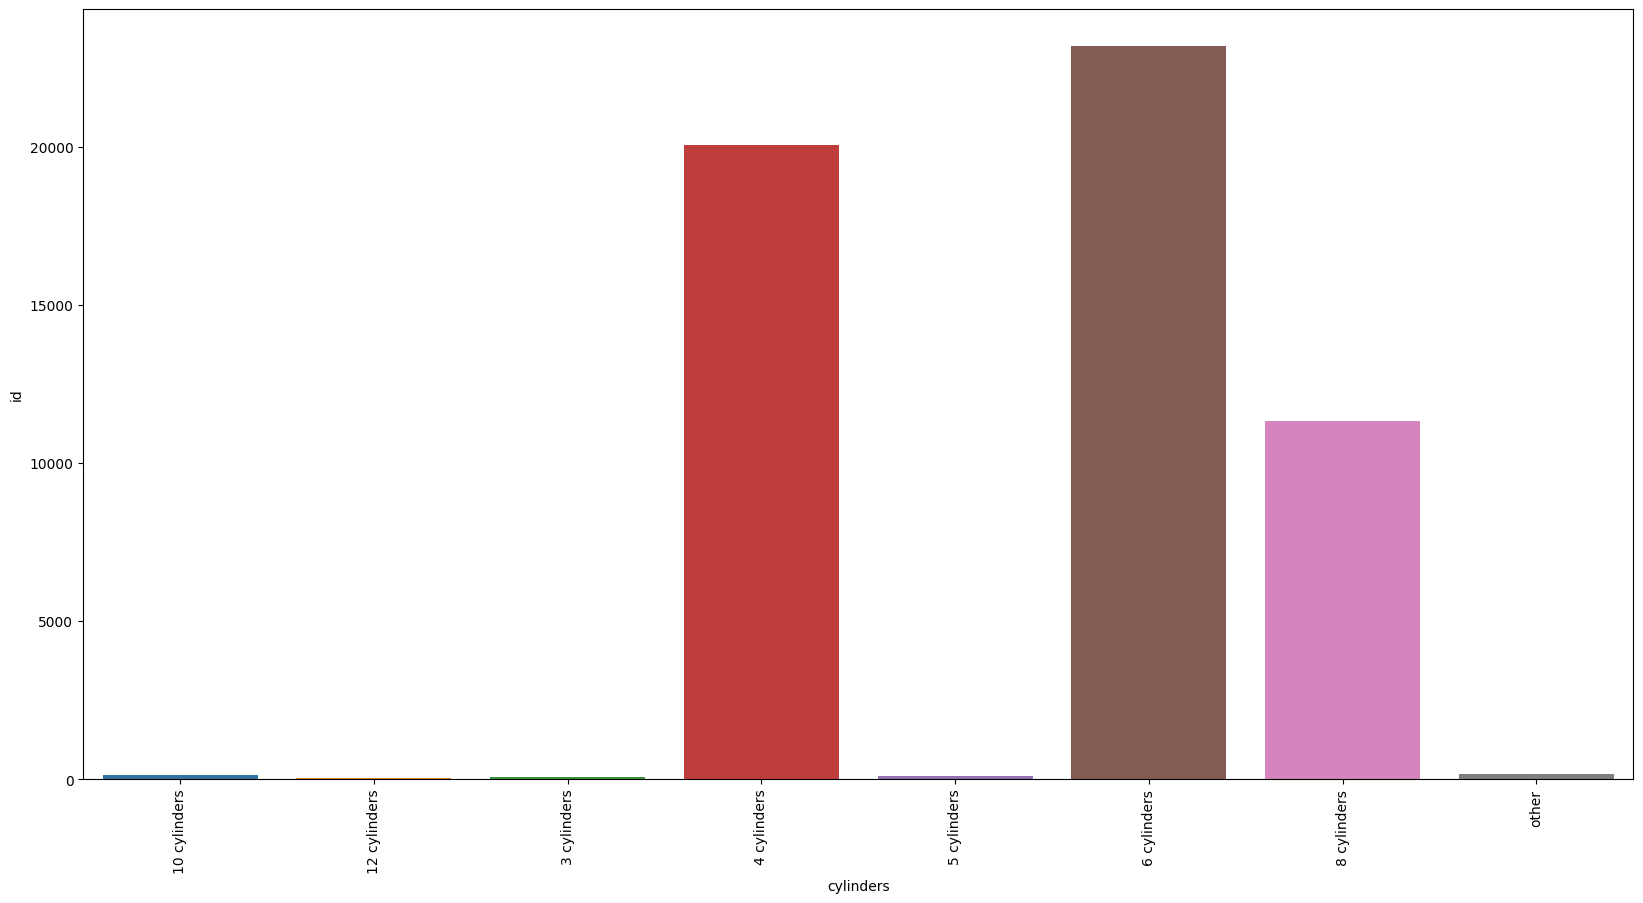

In [46]:
# データ処理
tmp_df = df[['id', 'cylinders']].groupby('cylinders').count()
tmp_df = tmp_df.reset_index()

# 可視化
plt.figure(figsize=(20, 10))
sns.barplot(y=tmp_df.id, x=tmp_df.cylinders)
plt.xticks(rotation=90)
plt.show()

In [12]:
#　燃料のotherも何や？
df.fuel.unique()

array(['gas', nan, 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

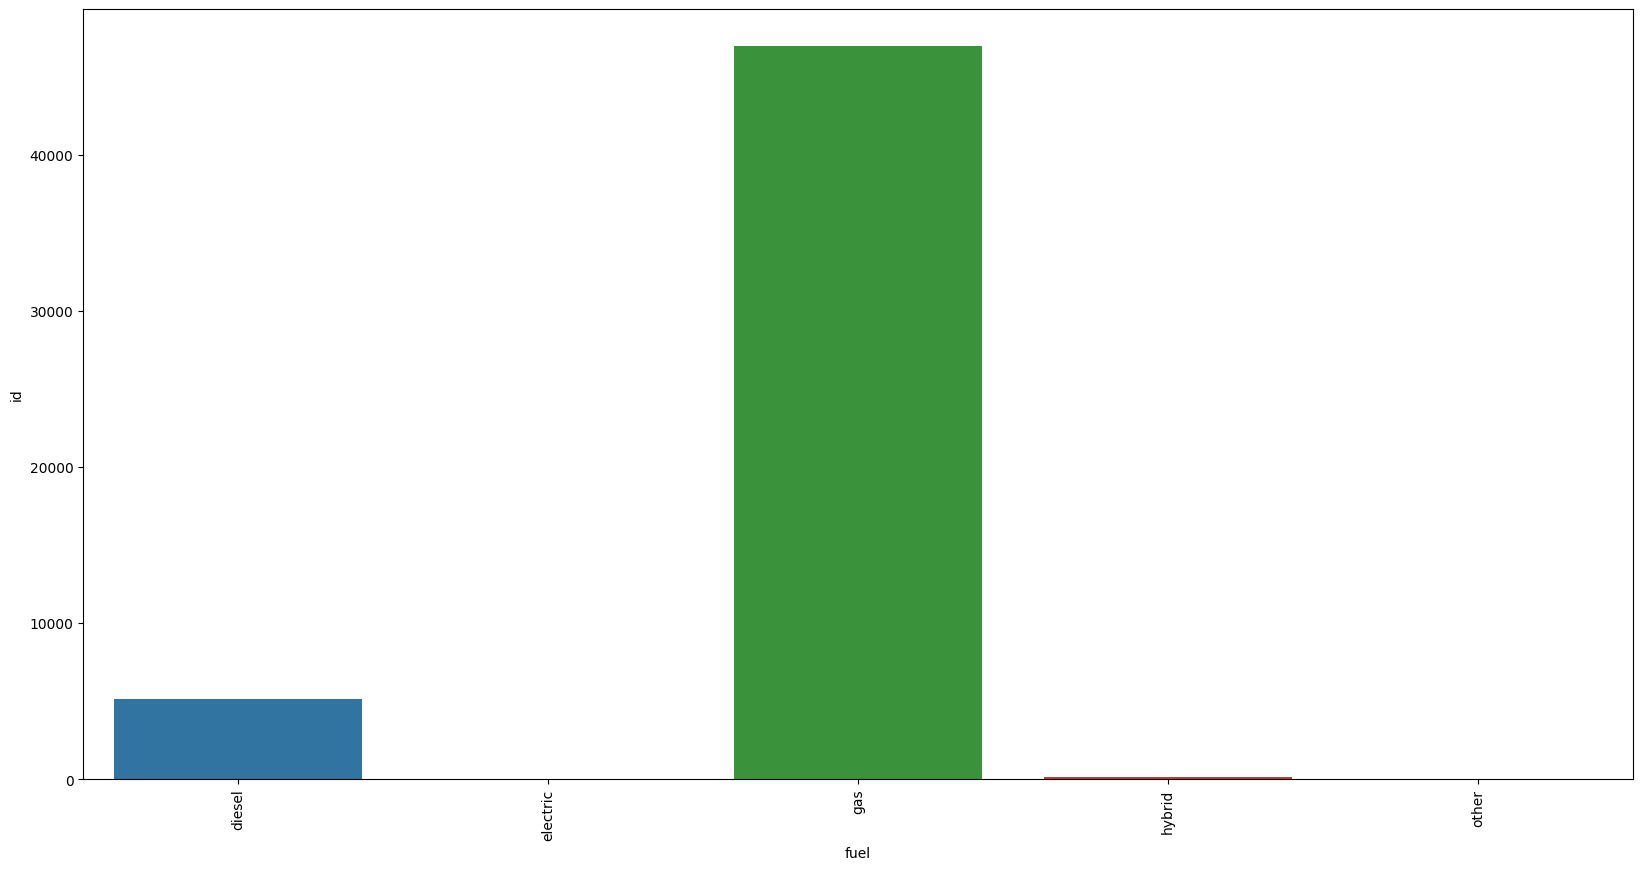

In [47]:
# データ処理
tmp_df = df[['id', 'fuel']].groupby('fuel').count()
tmp_df = tmp_df.reset_index()

# 可視化
plt.figure(figsize=(20, 10))
sns.barplot(y=tmp_df.id, x=tmp_df.fuel)
plt.xticks(rotation=90)
plt.show()

In [16]:
#　走行距離マイナスはおかしい
# →10~100kmで集約して分布確認
df.odometer.describe()

count    5.506900e+04
mean     1.163063e+05
std      6.183916e+04
min     -1.318690e+05
25%      7.905000e+04
50%      1.119370e+05
75%      1.506320e+05
max      2.946000e+06
Name: odometer, dtype: float64

In [18]:
#　特になし
df.title_status.unique()

array(['clean', 'rebuilt', nan, 'parts only', 'salvage', 'missing',
       'lien'], dtype=object)

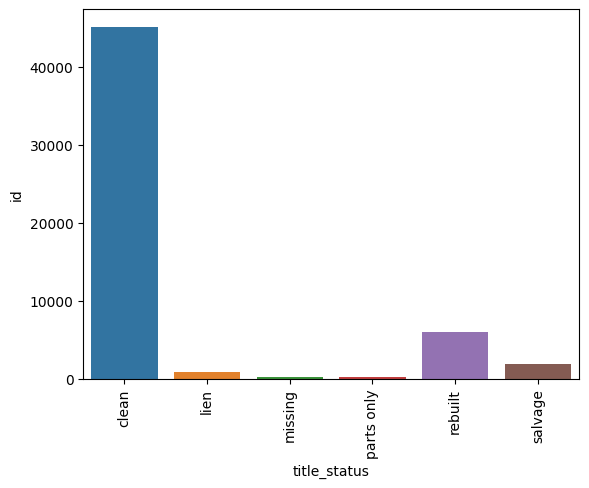

In [48]:
# データ処理
tmp_df = df[['id', 'title_status']].groupby('title_status').count()
tmp_df = tmp_df.reset_index()

# 可視化
sns.barplot(y=tmp_df.id, x=tmp_df.title_status)
plt.xticks(rotation=90)
plt.show()

In [19]:
#　特になし
df.transmission.unique()

array(['manual', 'automatic', 'other'], dtype=object)

In [20]:
#　特になし
df.drive.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

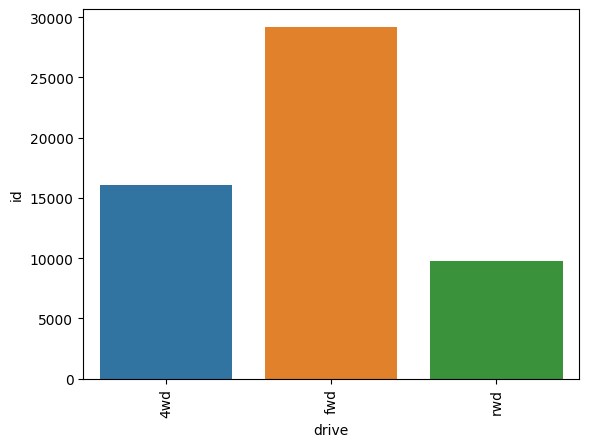

In [49]:
# データ処理
tmp_df = df[['id', 'drive']].groupby('drive').count()
tmp_df = tmp_df.reset_index()

# 可視化
sns.barplot(y=tmp_df.id, x=tmp_df.drive)
plt.xticks(rotation=90)
plt.show()

In [23]:
#　表記揺れあり
df['size'].unique()

array(['mid-size', 'full-size', 'sub-compact', 'compact', 'full−size',
       'fullーsize', 'mid−size', 'midーsize', 'subーcompact'], dtype=object)

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


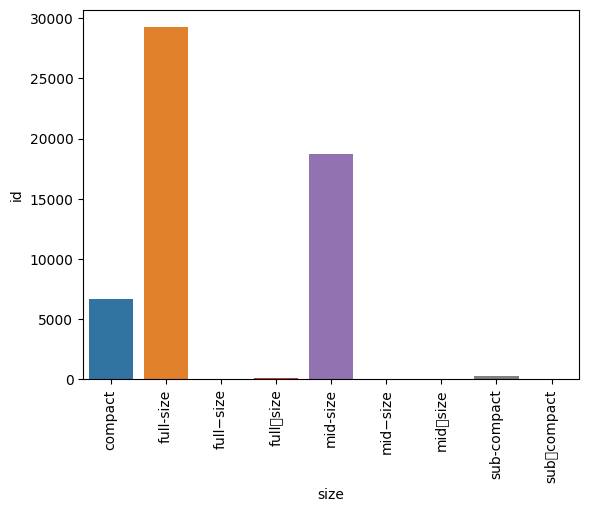

In [50]:
# データ処理
tmp_df = df[['id', 'size']].groupby('size').count()
tmp_df = tmp_df.reset_index()

# 可視化
sns.barplot(y=tmp_df.id, x=tmp_df['size'])
plt.xticks(rotation=90)
plt.show()

In [24]:
#　特になし
df.type.unique()

array(['convertible', 'sedan', 'SUV', 'coupe', nan, 'mini-van', 'pickup',
       'truck', 'van', 'hatchback', 'wagon', 'offroad', 'other', 'bus'],
      dtype=object)

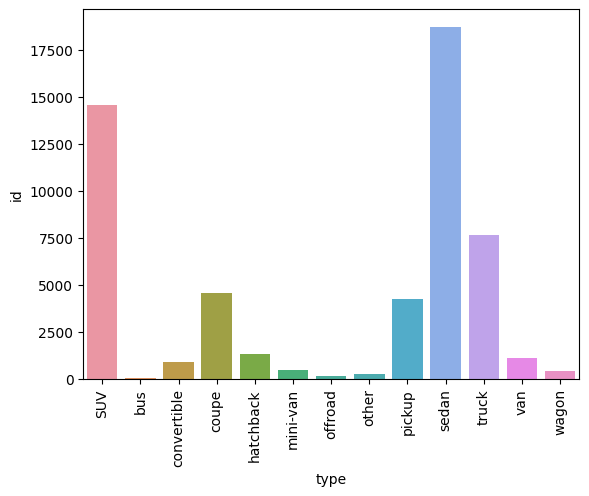

In [51]:
# データ処理
tmp_df = df[['id', 'type']].groupby('type').count()
tmp_df = tmp_df.reset_index()

# 可視化
sns.barplot(y=tmp_df.id, x=tmp_df.type)
plt.xticks(rotation=90)
plt.show()

In [25]:
#　特になし
df.paint_color.unique()

array(['orange', 'silver', 'blue', 'red', 'black', 'white', 'green',
       'brown', 'grey', 'purple', 'custom', 'yellow'], dtype=object)

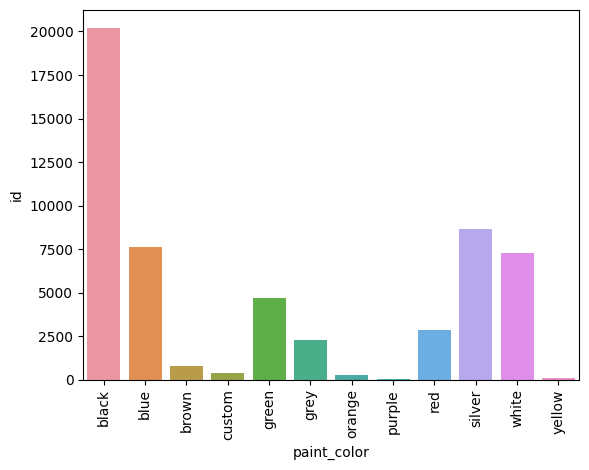

In [52]:
# データ処理
tmp_df = df[['id', 'paint_color']].groupby('paint_color').count()
tmp_df = tmp_df.reset_index()

# 可視化
sns.barplot(y=tmp_df.id, x=tmp_df.paint_color)
plt.xticks(rotation=90)
plt.show()

In [26]:
#　特になし
df.state.unique()


array([nan, 'pa', 'ks', 'ny', 'ca', 'al', 'or', 'va', 'mt', 'nj', 'ma',
       'wi', 'sc', 'wa', 'dc', 'oh', 'in', 'de', 'fl', 'nm', 'az', 'ok',
       'mn', 'co', 'nv', 'wv', 'tn', 'mi', 'ri', 'il', 'tx', 'ut', 'ia',
       'ga', 'md', 'mo', 'ky', 'nc', 'ak', 'id', 'ct', 'wy', 'nd', 'me',
       'ar', 'hi', 'sd', 'ne', 'nh', 'vt', 'la', 'ms'], dtype=object)

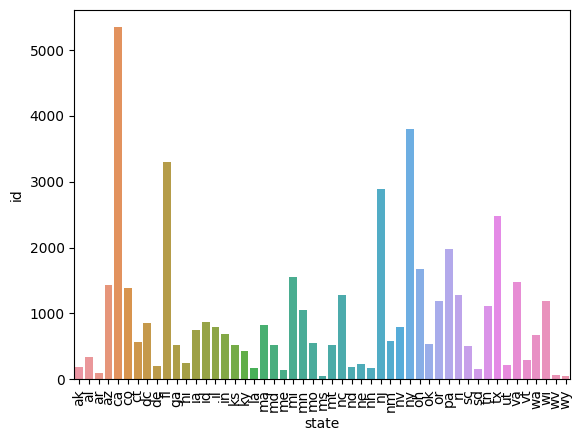

In [53]:
# データ処理
tmp_df = df[['id', 'state']].groupby('state').count()
tmp_df = tmp_df.reset_index()

# 可視化
sns.barplot(y=tmp_df.id, x=tmp_df.state)
plt.xticks(rotation=90)
plt.show()

In [27]:
#　特になし
tmp_df = df[~df.price.isna()]
tmp_df.price.describe()

count    27532.000000
mean     13468.724829
std      10962.149840
min       1004.000000
25%       5759.000000
50%       9206.000000
75%      19128.000000
max      96818.000000
Name: price, dtype: float64

In [3]:
df

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587.0
1,1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724.0
2,2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931.0
3,3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553.0
4,4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27532,55064,great falls,2016,gmc,excellent,6 cylinders,gas,90902,rebuilt,automatic,fwd,full-size,truck,black,mt,NaN
27533,55065,las vegas,2012,nissan,excellent,4 cylinders,gas,27234,rebuilt,automatic,fwd,mid-size,sedan,white,nv,NaN
27534,55066,phoenix,2002,bmw,excellent,6 cylinders,gas,99761,clean,automatic,rwd,full-size,coupe,blue,az,NaN
27535,55067,colorado springs,2006,bmw,excellent,6 cylinders,gas,162279,clean,automatic,4wd,mid-size,sedan,silver,co,NaN
